In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Spending Score (1-100)' : 'score' , 'Annual Income (k$)':'income'}, inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID',axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.corr() # show dataset corr value 

,Age,income,score
Age,1.000000,-0.012398,-0.327227
income,-0.012398,1.000000,0.009903
score,-0.327227,0.009903,1.000000


<AxesSubplot:>

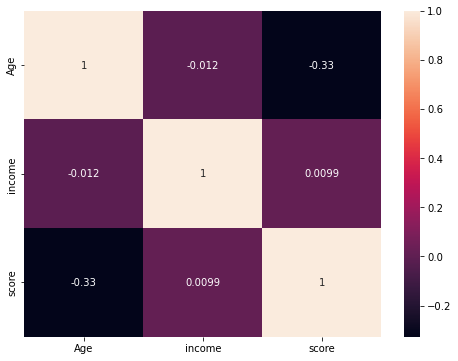

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

# Visualization

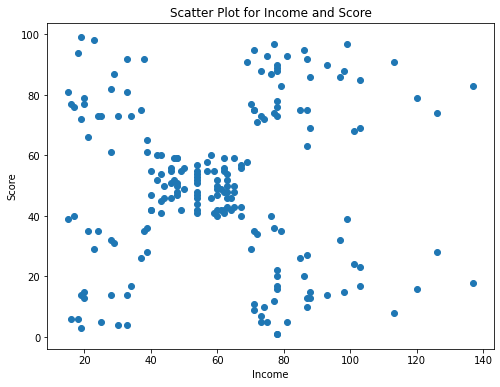

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['income'],df['score'])
plt.title('Scatter Plot for Income and Score')
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

<Figure size 576x432 with 0 Axes>

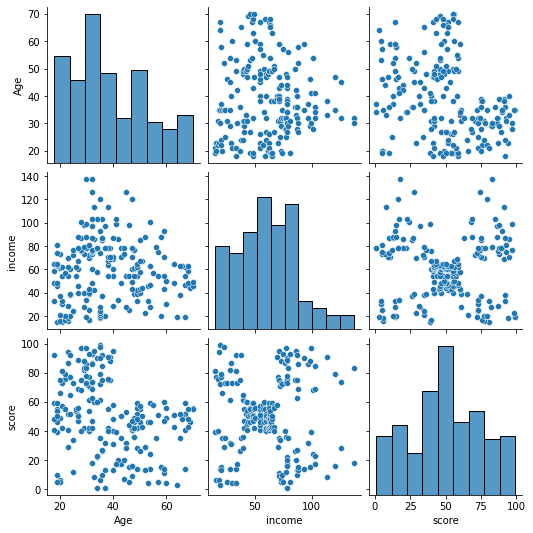

In [10]:
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

# KMeans cluster

In [11]:
import sklearn.cluster as cluster

In [12]:
kmeans = cluster.KMeans()

In [13]:
df['cluster'] = kmeans.fit_predict(df[['income','score']])

In [14]:
df.head()

,Gender,Age,income,score,cluster
0,Male,19,15,39,5
1,Male,21,15,81,7
2,Female,20,16,6,5
3,Female,23,16,77,7
4,Female,31,17,40,5


In [15]:
kmeans.cluster_centers_ # Show Centered Value

array([[ 62.58333333,  47.29166667],
       [ 45.51282051,  51.51282051],
       [109.7       ,  82.        ],
       [ 79.73913043,  13.39130435],
       [ 78.55172414,  82.17241379],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 24.95      ,  81.        ]])

In [16]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]


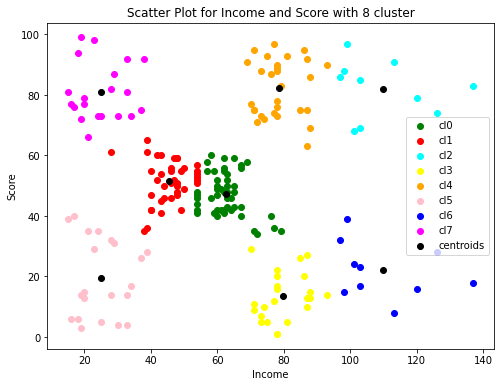

In [23]:
plt.figure(figsize=(8,6))
cluster=kmeans.cluster_centers_
plt.scatter(df0['income'], df0['score'], color='green', label='cl0')
plt.scatter(df1['income'], df1['score'], color='red', label='cl1')
plt.scatter(df2['income'], df2['score'], color='cyan', label='cl2')
plt.scatter(df3['income'], df3['score'], color='yellow', label='cl3')
plt.scatter(df4['income'], df4['score'], color='orange', label='cl4')
plt.scatter(df5['income'], df5['score'], color='pink', label='cl5')
plt.scatter(df6['income'], df6['score'], color='blue', label='cl6')
plt.scatter(df7['income'], df7['score'], color='magenta', label='cl7')
plt.scatter(cluster[:,0],cluster[:,1],color='black',label='centroids')
plt.title('Scatter Plot for Income and Score with 8 cluster')
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()

# Select Optimal Number Of Clusters

In [31]:
from sklearn.cluster import KMeans
wcss = []
c = range(1,15)
for i in c:
    kmeans2 = KMeans(n_clusters=i) 
    kmeans2.fit(df[['income', 'score']])
    wcss.append(kmeans2.inertia_) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30259.657207285458,
 25018.781613414074,
 22897.01091867235,
 19646.482018947245,
 17702.555143973317,
 15926.627039985113,
 14666.474696940497,
 13147.857713837882]

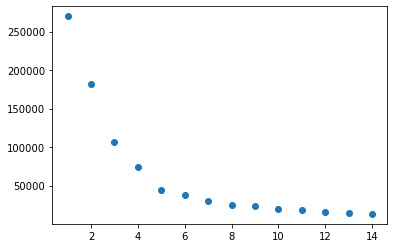

In [33]:
plt.scatter(c,wcss)

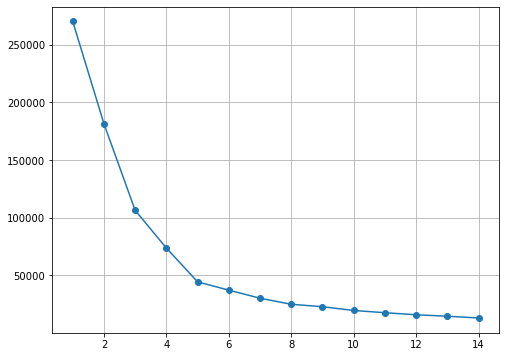

In [35]:
plt.figure(figsize=(8,6))
plt.plot(c,wcss,marker='o')
plt.grid()
plt.show()

In [36]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [38]:
from kneed import KneeLocator 

In [39]:
kn = KneeLocator(c, wcss, curve='convex', direction = 'decreasing')

In [40]:
kn.knee

5

In [41]:
print('Optimal number of clusters =', kn.knee)

Optimal number of clusters = 5


# After Tuning

In [42]:
import sklearn.cluster as cluster2

In [43]:
kmean3 = cluster2.KMeans(n_clusters=5)

In [44]:
df['new_cluster'] = kmean3.fit_predict(df[['income', 'score']])

In [45]:
df.head()

,Gender,Age,income,score,cluster,new_cluster
0,Male,19,15,39,5,4
1,Male,21,15,81,7,1
2,Female,20,16,6,5,4
3,Female,23,16,77,7,1
4,Female,31,17,40,5,4


In [46]:
centers2 = kmean3.cluster_centers_

In [47]:
centers2

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])